## Takes in output file from KAAS and writes file that includes only the trascripts assigned to a KEGG ID

In [1]:
with open ('mobl_KO_only.txt', 'w') as f:
    with open ('mobl_ko.txt', 'r') as file:
        for line in file:
            if "K" in line:
                anno = line
                f.write(line)

## Counting number of each ORF type from Transdcoder 

In [5]:
icount = 0
tcount = 0
fcount = 0
ccount = 0
with open ('mobl.transdecoder_CDS.fasta', 'r') as file:
    for line in file:
        if "internal" in line:
            icount += 1
        elif '3prime_partial' in line:
            tcount += 1
        elif '5prime_partial' in line:
            fcount += 1
        elif 'complete' in line:
            ccount += 1
print("Complete ORF Type: " + str(ccount))
print("Internal ORF Type: " + str(icount))
print("3 prime ORF Type: " + str(tcount))
print("5 prime ORF Type: " + str(fcount))

Complete ORF Type: 34558
Internal ORF Type: 10500
3 prime ORF Type: 5996
5 prime ORF Type: 17070


## Busco graph 

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_excel('busco_stats.xlsx').set_index("Species")
df

,Complete and single-copy,Complete and duplicated,Fragmented,Missing
Species,,,,
H.thomasi,35.6,62.4,2.0,0.0
A. geoffroyi,44.6,50.8,4.3,0.3
G. soricina,53.8,42.6,3.6,0.0
C. brevicauda,46.9,49.5,3.3,0.3
C. villosum,34.7,64.3,1.0,0.0
S. ludovici,38.3,59.1,2.6,0.0
A. jamaicensis,47.2,48.8,3.6,0.4
D. rotundus,41.6,53.8,4.6,0.0
M. blainvillei,36.0,63.0,1.0,0.0


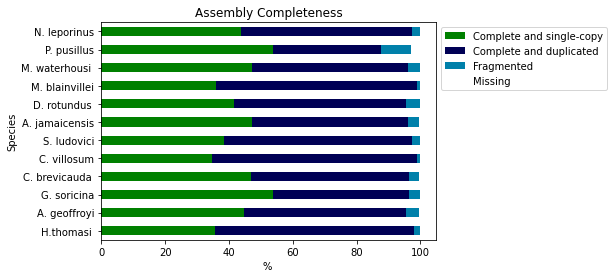

In [18]:
plot = df.plot.barh(stacked=True, cmap="ocean")
plot.set_title("Assembly Completeness")
plot.set_xlabel("% ")
plot.legend(bbox_to_anchor=(1.0, 1.0))

## Transdecoder Graph 

In [4]:
trans = pd.read_excel('transdecoder_done_stats.xlsx').set_index("Species")
trans

,Complete,Internal,3 Prime,5 Prime
Species,,,,
H.thomasi,30887,9692,5491,14999
A. geoffroyi,23548,10062,4446,12859
G. soricina,22455,10089,4498,12650
C. brevicauda,26470,10508,5142,13929
C. villosum,35183,9618,5780,16616
S. ludovici,28862,9954,5497,13689
A. jamaicensis,26951,10813,4771,15687
D. rotundus,27238,11661,4724,17027
M. blainvillei,34558,10500,5996,17070


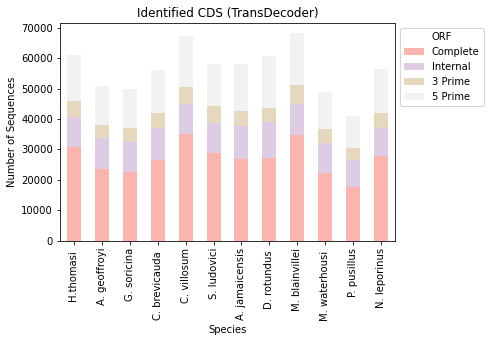

In [5]:
plot2 = trans.plot.bar(stacked=True, cmap = "Pastel1")
plot2.set_title("Identified CDS (TransDecoder)")
plot2.set_ylabel("Number of Sequences")
plot2.legend(bbox_to_anchor=(1.0, 1.0), title='ORF')